## Objective 01 - represent a document as vector


In [39]:
# Create the corpus with random sentences

corpus = ["Karma, karma, karma, karma, karma chameleon.",
          "The paintbrush was angry at the color the chameleon chose to use.",
          "She stomped on her fruit loops and thus became a cereal killer.",
          "He hated that he loved what she hated about cereal and her chameleon."
         ]

In [40]:
# Frequency-count

# import the feature_extraction module and vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the object and count the words
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)

# Convert to dense vectors (leave out the zeroes)
print(vectors.todense())

[[0 0 0 0 0 0 1 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 1 1 1 0]
 [0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0]
 [1 1 0 0 0 1 1 0 0 0 2 2 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1]]


In [41]:
# one-hot encoding of words counts

# import the binary encoder
from sklearn.preprocessing import Binarizer

# instantiate the vectorizer and get the word counts
freq = CountVectorizer()
corpus_freq = freq.fit_transform(corpus)

# instantiate the binarizer and create the binary encoded vector
onehot = Binarizer()
corpus_onehot = onehot.fit_transform(corpus_freq.toarray())

# display the one-hot encoder vector
corpus_onehot

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1]])

In [42]:
# import libraries and modules
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=500)

# create a vocabulary and get word counts per document
dtm1 = tfidf.fit_transform(corpus)

# get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm1.todense(), columns=tfidf.get_feature_names())

# View feature matrix as DataFrame
dtm.head()

,angry,cereal,chameleon,chose,color,fruit,hated,karma,killer,loops,loved,paintbrush,stomped,use
0,0.000000,0.000000,0.126630,0.000000,0.000000,0.000000,0.00000,0.99195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.430037,0.000000,0.274487,0.430037,0.430037,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.430037,0.000000,0.430037
2,0.000000,0.366739,0.000000,0.000000,0.000000,0.465162,0.00000,0.00000,0.465162,0.465162,0.000000,0.000000,0.465162,0.000000
3,0.000000,0.321093,0.259952,0.000000,0.000000,0.000000,0.81453,0.00000,0.000000,0.000000,0.407265,0.000000,0.000000,0.000000


In [43]:
dtm1.todense()

matrix([[0.        , 0.        , 0.12662977, 0.        , 0.        ,
         0.        , 0.        , 0.99195005, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.43003652, 0.        , 0.27448674, 0.43003652, 0.43003652,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.43003652, 0.        , 0.43003652],
        [0.        , 0.36673901, 0.        , 0.        , 0.        ,
         0.46516193, 0.        , 0.        , 0.46516193, 0.46516193,
         0.        , 0.        , 0.46516193, 0.        ],
        [0.        , 0.32109252, 0.25995207, 0.        , 0.        ,
         0.        , 0.8145303 , 0.        , 0.        , 0.        ,
         0.40726515, 0.        , 0.        , 0.        ]])

## Objective 02 - query documents by similarity


In [44]:
# Create the corpus (text is available in a github repo)

# Import module, open and read file
from urllib.request import urlopen

# text consists of three documents on three different subjects
link = 'https://raw.githubusercontent.com/nwhoffman/NLP_example_text/master/u4s1m2_similarity.txt'
f = urlopen(link)
myfile = f.read()

my_string = str(myfile, 'utf-8')
corpus = my_string.split(';')

# print out the first 300 characters for each document
for i in [0, 1, 2]:
    print('Document:', i)
    print(corpus[i][0:300])

Document: 0
The gravitational forces exerted by the Moon at several points on Earth are illustrated in Figure 4.16. These forces differ slightly from one another because Earth is not a point, but has a certain size: all parts are not equally distant from the Moon, nor are they all in exactly the same direction 
Document: 1
 A cell is the smallest unit of a living thing. Whether comprised of one cell (like bacteria) or many cells (like a human), we call it an organism. Thus, cells are the basic building blocks of all organisms. Several cells of one kind that interconnect with each other and perform a shared function fo
Document: 2
 What do aching feet, a falling apple, and the orbit of the Moon have in common? Each is caused by the gravitational force. Our feet are strained by supporting our weight—the force of Earth’s gravity on us. An apple falls from a tree because of the same force acting a few meters above Earth’s surfac


In [46]:
# create the vectors for each document
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=500)

# create a vocabulary and get tfidf values per document
dtm1 = tfidf.fit_transform(corpus)
dtm1

<3x147 sparse matrix of type '<class 'numpy.float64'>'
	with 154 stored elements in Compressed Sparse Row format>

In [48]:
# get feature names to use as DataFrame column headers
dtm = pd.DataFrame(dtm1.todense(), columns=tfidf.get_feature_names())

# view the feature matrix as a DataFrame
dtm.head()

,16,able,aching,acting,acts,animal,apple,attracted,attraction,bacteria,...,types,underlying,understood,unit,universe,valid,vary,ways,weakest,weight
0,0.082019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164038,0.082019,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.071219,0.000000,0.000000,0.000000,0.071219,...,0.071219,0.000000,0.000000,0.071219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.088592,0.088592,0.088592,0.088592,0.000000,0.177185,0.000000,0.000000,0.000000,...,0.000000,0.088592,0.088592,0.000000,0.088592,0.088592,0.088592,0.088592,0.088592,0.088592


In [50]:
# find the cosine similarity of tf-idf vectors
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim1 = cosine_similarity(dtm)

# turn it into a dataframe
cosine_sim = pd.DataFrame(cosine_sim1)
cosine_sim

,0,1,2
0,1.000000,0.000000,0.197532
1,0.000000,1.000000,0.007299
2,0.197532,0.007299,1.000000


# Objective 03 - apply word embedding models to create document vectors


In [53]:
%time
# import the library and model
import spacy
nlp = spacy.load('en_core_web_md')

# set the document (this example contains two words)
doc = nlp("drama llama")

# get the vectors for document
# (the vectors are the average of the two word vectors)
llama_vector = doc.vector

# look length of the vector (how many dimensions)
print(llama_vector.shape)

# display part of the vector
print(llama_vector[:10])

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs
(300,)
[ 0.16385    -0.09699     0.002195   -0.10677501 -0.328255    0.04397523
  0.1701     -0.44458503  0.1808675   0.50474995]


In [54]:
# find the similarity score for example words

# compare "llama" and "horses"
print("The similarity score for llama-llama is: ", nlp("llama").similarity(nlp("llama")))
print("The similarity score for llama-horse is: ", nlp("llama").similarity(nlp("horse")))
print("The similarity score for llama-car is: ", nlp("llama").similarity(nlp("car")))

The similarity score for llama-llama is:  1.0
The similarity score for llama-horse is:  0.003944606689442032
The similarity score for llama-car is:  -0.028409473214859177


In [58]:
# import the PCA(Principle Component Analysis) to project the two most important components into a 2-D space
from sklearn.decomposition import PCA

# define a function to find the vector for a word
def get_words_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

# example word list to find vectors for

words = ['python', 'javascript', 'code', 'data', 'linux',
        'llama', 'alpaca', 'cat', 'snake',
        'cook', 'bake', 'cookie', 'clean', 'car']

# initialize the PCA model and project down to two dimensions
pca = PCA(n_components=2)

# fit the PCA model on the word list:
pca.fit(get_words_vectors(words))

# apply the transformation learned from the PCA model
word_vecs_2d = pca.transform(get_words_vectors(words))

# look at the 2-D array (which is just x and y coordinates)
word_vecs_2d

array([[-3.27790091e+00,  1.42835206e+00],
       [-3.71002986e+00, -1.36484891e+00],
       [-3.03559922e+00, -2.35975085e+00],
       [-2.37095846e+00, -3.03642957e+00],
       [-3.21122757e+00, -3.46616713e-01],
       [-7.31958196e-01,  5.49145228e+00],
       [ 2.28490406e+00,  2.28918560e+00],
       [ 1.08795320e+00,  1.53895616e+00],
       [ 3.10100963e-01,  2.62330332e+00],
       [ 4.04693449e+00, -1.29091765e+00],
       [ 4.46350100e+00, -2.05047252e+00],
       [ 1.85349701e+00, -2.32259937e+00],
       [ 1.45947725e+00, -5.98759225e-01],
       [ 8.31306243e-01, -8.54601015e-04]])

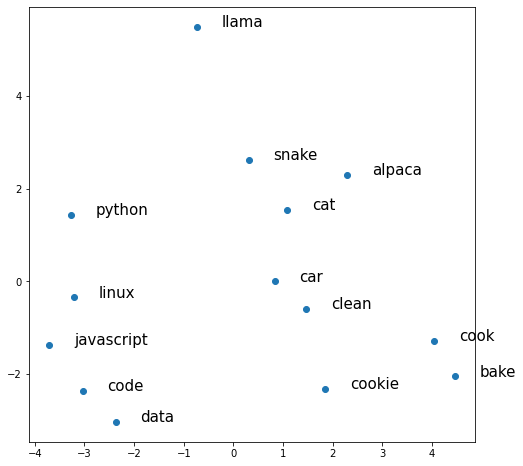

In [59]:
# import for plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# display the text of the words at each point
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x+0.5, y, word, size=15)

# show the plot
plt.show()